# Image Stitching and Epipolar Geometry

This notebook demonstrates two computer vision applications:
1. Epipolar Geometry - Computing the fundamental matrix
2. Image Stitching - Creating panoramic images

In [1]:
# Import necessary libraries
import os
import random
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Import custom modules 
# Note: Run this after installing the package or add the src directory to the Python path
import sys
sys.path.append('..')
from src.epipolar_geometry import *
from src.image_stitching import *
from src.utils import *

# Part 1: Epipolar Geometry

## Overview

In this section, we implement an algorithm for automatically estimating the fundamental matrix with RANSAC. We use the normalized 8-point algorithm to compute the fundamental matrix.

In [2]:
# Load data
data_path = '../data/Part1_data/matches.mat'
x1, y1, x2, y2 = load_data_from_mat(data_path)

In [3]:
# Calculate number of iterations based on desired probability and outlier ratio
s = 8  # minimum number of points needed
p = 0.99  # desired probability of success
e = 0.4  # estimated outlier ratio
num_iters = int(np.log(1 - p)/np.log(1 - (1 - e)**s))
threshold = 0.01

# Estimate the fundamental matrix
F = estimate_fundamental_matrix(x1, y1, x2, y2, num_iterations=num_iters, threshold=threshold)

print("Fundamental Matrix F:")
print(F)

# Also print normalized F for better numerical stability
F_norm = np.linalg.norm(F)
F_normalized = F / F_norm
print("\nFundamental Matrix F (normalized to unit norm):")
print(F_normalized)

Fundamental Matrix F:
[[-1.31938332e-05 -2.03554038e-04  1.13463821e-02]
 [ 2.62563671e-04  3.46983792e-05  4.35880544e-02]
 [-1.64273489e-02 -5.77359825e-02  1.00000000e+00]]

Fundamental Matrix F (normalized to unit norm):
[[-1.31568351e-05 -2.02983233e-04  1.13145646e-02]
 [ 2.61827391e-04  3.46010782e-05  4.34658249e-02]
 [-1.63812833e-02 -5.75740795e-02  9.97195803e-01]]


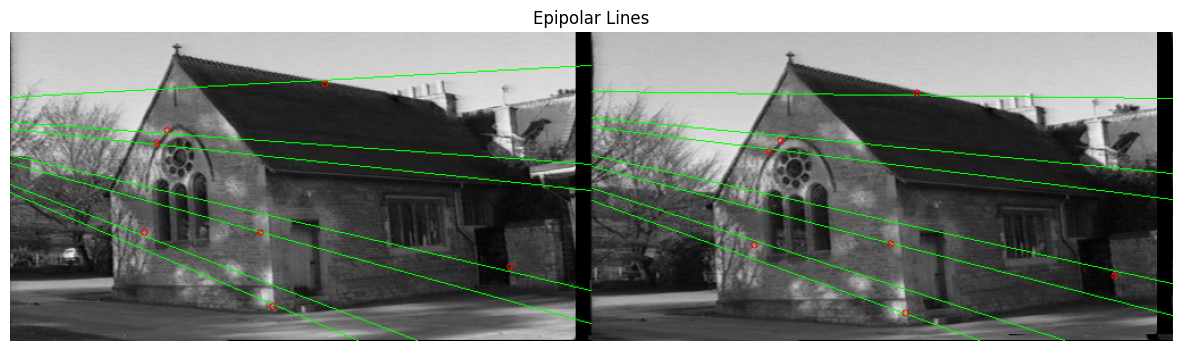

In [4]:
# Visualize epipolar lines
img1_path = '../data/Part1_data/chapel00.png'
img2_path = '../data/Part1_data/chapel01.png'
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

if img1 is None or img2 is None:
    print("Error: Could not load images. Please check the file paths.")
else:
    # Plot epipolar lines
    result_img = plot_epipolar_lines(img1, img2, x1, y1, x2, y2, F, num_points=7)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Epipolar Lines')
    plt.show()

# Part 2: Image Stitching

## Overview

In this section, we implement an algorithm for stitching multiple images to create panoramas. The steps include:

1. Detect keypoints
2. Match keypoints
3. Estimate homography with matched keypoints (using RANSAC)
4. Combine images

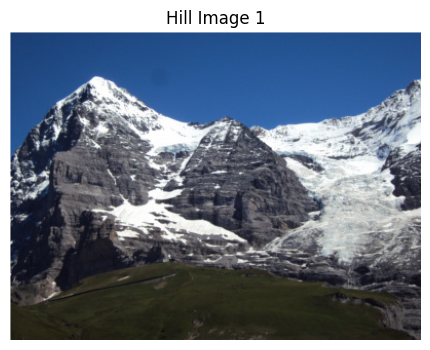

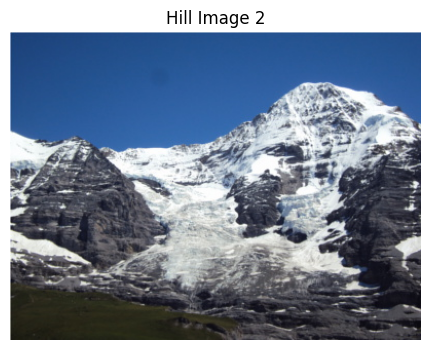

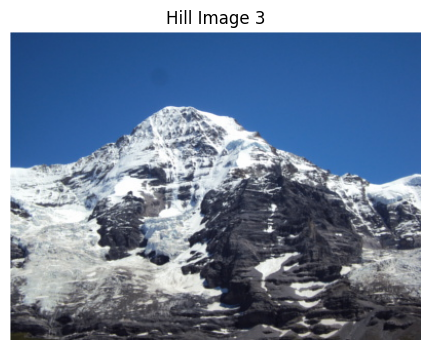

Stitching Hill images 2 and 3...


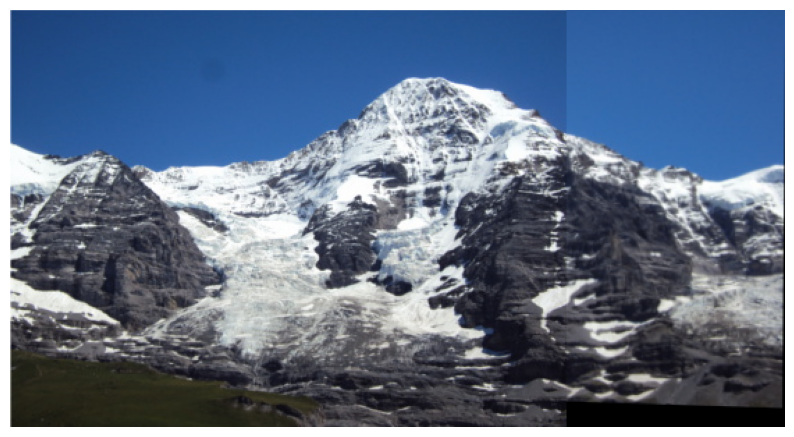

Stitching Hill image 1 with the previous result...


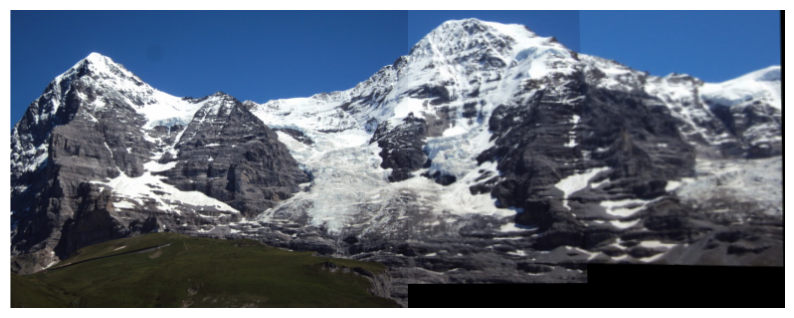

In [5]:
# Example 1: Hill panorama
hill_dir = '../data/hill'
hill_images = load_images_from_directory(hill_dir)

if hill_images:
    # Display the individual images
    for i, img in enumerate(hill_images):
        plt.figure(figsize=(6, 4))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Hill Image {i+1}')
        plt.axis('off')
        plt.show()
    
    # First stitch images 2 and 3
    print('Stitching Hill images 2 and 3...')
    stitched_23 = stitch_images(hill_images[1], hill_images[2])
    display_image(stitched_23)
    
    # Then stitch with image 1
    print('Stitching Hill image 1 with the previous result...')
    final_hill_panorama = stitch_images(hill_images[0], stitched_23)
    display_image(final_hill_panorama)
else:
    print("No images found in the hill directory. Please check the path.")

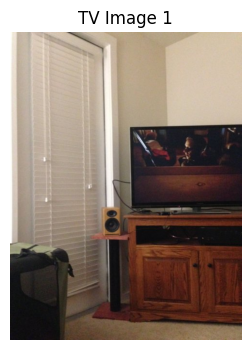

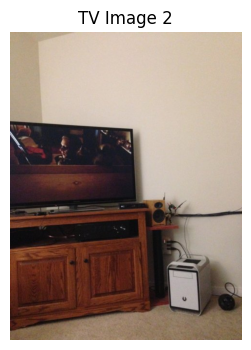

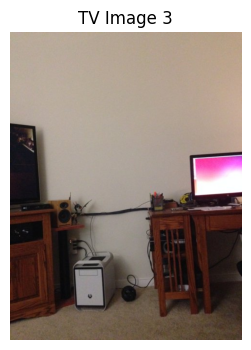

Stitching TV images 2 and 3...


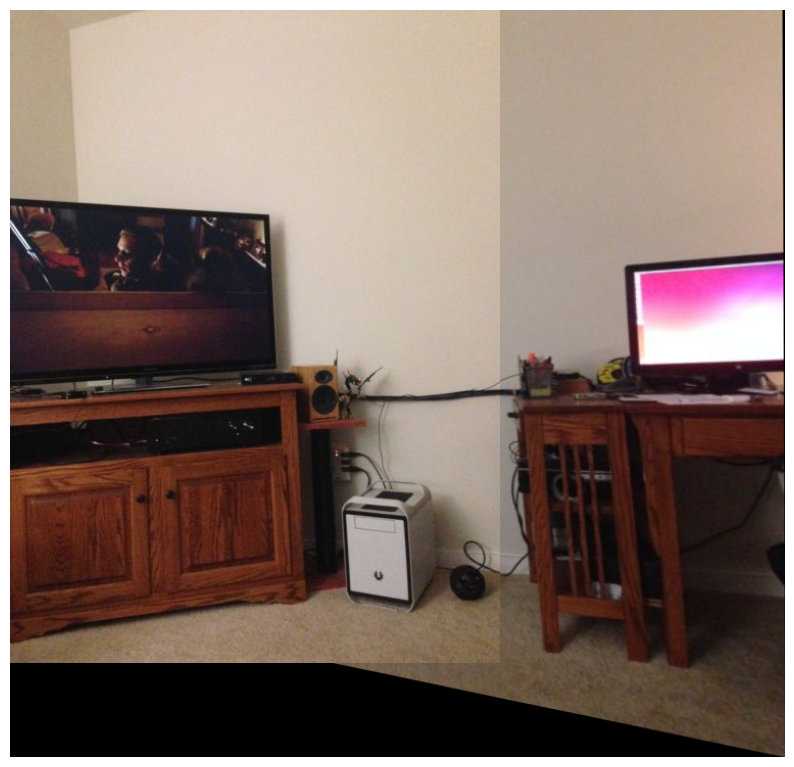

Stitching TV image 1 with the previous result...


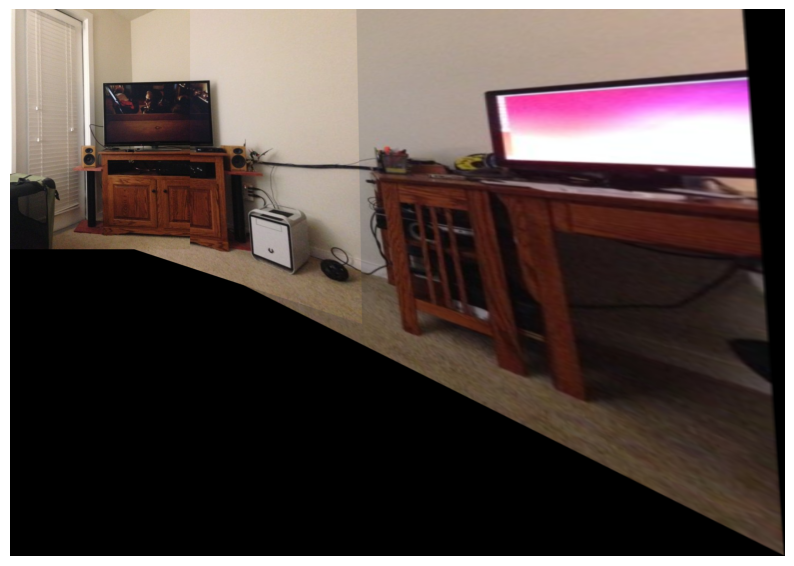

In [6]:
# Example 2: TV panorama
tv_dir = '../data/tv'
tv_images = load_images_from_directory(tv_dir)

if tv_images:
    # Display the individual images
    for i, img in enumerate(tv_images):
        plt.figure(figsize=(6, 4))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'TV Image {i+1}')
        plt.axis('off')
        plt.show()
    
    # First stitch images 2 and 3
    print('Stitching TV images 2 and 3...')
    stitched_23 = stitch_images(tv_images[1], tv_images[2])
    display_image(stitched_23)
    
    # Then stitch with image 1
    print('Stitching TV image 1 with the previous result...')
    final_tv_panorama = stitch_images(tv_images[0], stitched_23)
    display_image(final_tv_panorama)
else:
    print("No images found in the TV directory. Please check the path.")